# Exploratory Data Analysis

## Import some libraries...

In [1]:
# import libraries for EDA
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt

In [2]:
# import libraries for connecting to S3
import boto3 
import botocore 
from sagemaker import get_execution_role 

## Connect to S3 and read 6k eval data...

In [3]:
# connect to data in S3 
role = get_execution_role() 
bucket = 'sagemaker-060720' 
data_key = 'evalOFFdata.csv' 
data_location = 's3://{}/{}'.format(bucket, data_key) 

In [4]:
# load 6k eval data
data = pd.read_csv(data_location)

In [5]:
data.head()

,index,product_name,countries_en,image_ingredients_url,ingredients_text
0,1189,creme fraiche,United States,https://static.openfoodfacts.org/images/produc...,INGREDIENTS: GRADE A CULTURED HEAVY CREAM
1,1257,"Organic tomatoes, diced in tomato juice",United States,https://static.openfoodfacts.org/images/produc...,"Organic tomatoes, organic tomato juice from co..."
2,1410,Peanut butter,United States,https://static.openfoodfacts.org/images/produc...,"Dry roasted peanuts, salt."
3,1414,Salsa Verde,United States,https://static.openfoodfacts.org/images/produc...,"TOMATILLO, GREEN CHILI (GREEN CHILI PEPPER, SA..."
4,1470,Coffee mate Italian sweet cream,United States,https://static.openfoodfacts.org/images/produc...,"water, sugar, vegetable oil (high ole soybean ..."


In [6]:
data.shape

(6576, 5)

## Look at first ingredient text and image...

In [7]:
# url of first image
data.image_ingredients_url[0]

'https://static.openfoodfacts.org/images/products/000/093/933/3330/ingredients_en.9.400.jpg'

In [8]:
# render url to image
image = io.imread(data.image_ingredients_url[0])

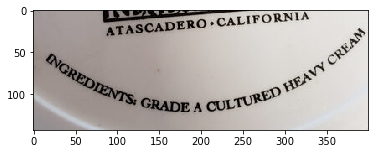

In [9]:
plt.imshow(image)

In [10]:
data.ingredients_text[0]

'INGREDIENTS: GRADE A CULTURED HEAVY CREAM'

## Look at text and image for Goldfish ingredients...

In [11]:
# text for goldfish ingredients
data.ingredients_text[data.product_name == 'Pepperidge farm crackers'][370]

'Made with Smiles and Unbleached Enriched Wheat Flour (Flour, Niacin, Reduced Iron, Thiamine Mononitrate [Vitamin B1], Riboflavin [Vitamin B2], Folic Acid), Cheddar Cheese ([Cultured Milk, Salt, Enzymes], Annatto), Vegetable Oils (Canola, Sunflower and/or Soybean), Contains 2 Percent or Less of: Salt, Yeast, Sugar, Autolzed Yeast, Leavening (Baking Soda, Monocalcium Phosphate, Ammonium Bicarbonate), Paprika, Spices (Contains Celery), and Dehydrated Onions.'

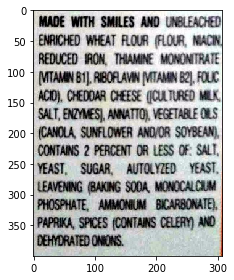

In [12]:
# image for goldfish ingredients 
io.imshow(data[data.product_name == 'Pepperidge farm crackers']['image_ingredients_url'][370])